# Ejemplo 1, Unidad 5

Los siguientes datos representan mediciones de resistencia al doblamiento y a la torsión de 12 raquetas de distintas marcas.

marca,resistencia_dob,resistencia_tor
Dunlop Maxply Fort,419,227
Garcia 240,407,231
Bancroft Bjorn Borg,363,200
Wilson Jack Kramer,360,211
Davis Classic,257,182
Spalding Smasher III,622,304
Yonex T-7500,424,384
Prince,359,194
Wilson T-400,346,158
Yamaha YFG-30,556,225


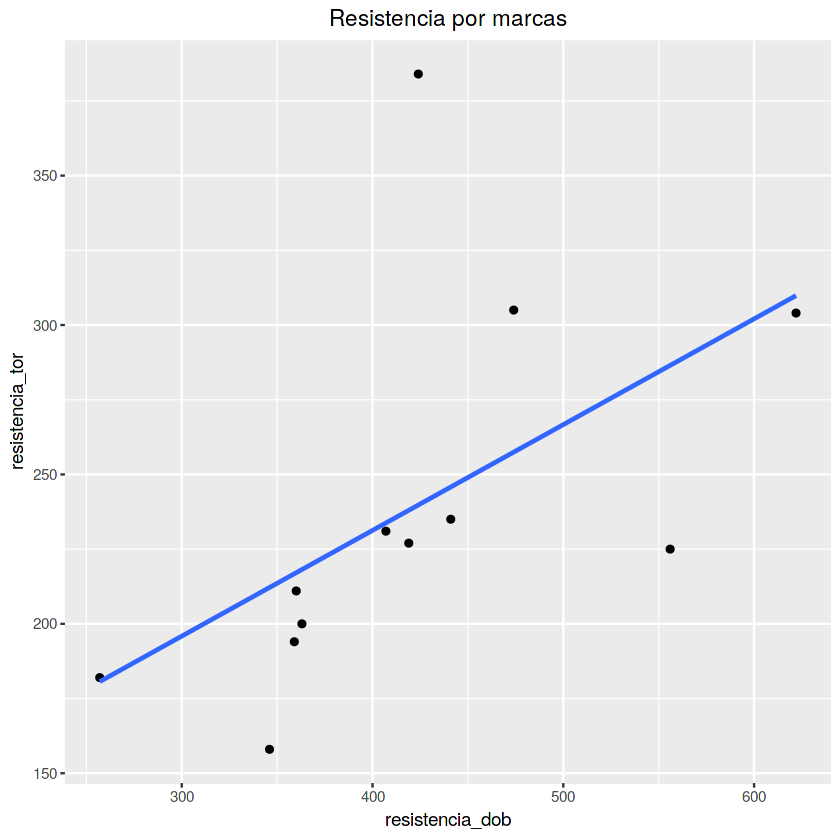

In [1]:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
marca <- c(
    "Dunlop Maxply Fort",
    "Garcia 240",
    "Bancroft Bjorn Borg",
    "Wilson Jack Kramer",
    "Davis Classic",
    "Spalding Smasher III",
    "Yonex T-7500",
    "Prince",
    "Wilson T-400",
    "Yamaha YFG-30",
    "Head Competition II",
    "Adidas Adistar"
)

#Resistencia al doblamiento(x)
resistencia_dob <- c(419, 407, 363, 360, 257, 622,
                     424, 359, 346, 556, 474, 441
)

#Resistencia a la torsión(y)
resistencia_tor <- c(227, 231, 200, 211, 182, 304,
                     384, 194, 158, 225, 305, 235
)

mediciones <- data.frame(marca, resistencia_dob, resistencia_tor)
mediciones

mi_grafico <- mediciones %>%
  ggplot(aes(x=resistencia_dob, y=resistencia_tor)) +
    ggtitle("Resistencia por marcas") +
    theme(plot.title = element_text(hjust = 0.5)) + # Para centrar título de la gráfica
    geom_point(stat="identity") +
    geom_smooth(method="lm" , se = FALSE) #Esto es para agregar la línea
    # se  = FALSE es para no mostrar el intervalo de confianza
plot(mi_grafico)

In [2]:
x_barra <- mean(mediciones$resistencia_dob)
s_x <- sd(mediciones$resistencia_dob)
y_barra <- mean(mediciones$resistencia_tor)
s_y<- sd(mediciones$resistencia_tor)
print(paste("x media = ", x_barra, "s_x", s_x))
print(paste("y media = ", y_barra, "y_x", s_y))

[1] "x media =  419 s_x 97.9081201943945"
[1] "y media =  238 y_x 63.3561362458286"


In [3]:
cov(mediciones[,2:3])

,resistencia_dob,resistencia_tor
resistencia_dob,9586,3393
resistencia_tor,3393,4014


In [4]:
r <- cor(mediciones[,2:3])
r
r <- r[1,2]
print(paste("r =", r))

,resistencia_dob,resistencia_tor
resistencia_dob,1.0000000,0.5469863
resistencia_tor,0.5469863,1.0000000


[1] "r = 0.546986317954248"


In [5]:
n <- nrow(mediciones)      
t_calculado <- (r * sqrt(n - 2)) / sqrt(1 - (r^2))
print(paste("t calculado =", t_calculado))

[1] "t calculado = 2.06622478842892"


In [6]:
t_tabla <- qt(.025, df = 10)
t_tabla

[1] -2.228139

In [7]:
suppressMessages(library(Rmisc))
summarySE(data=mediciones, measurevar = "resistencia_dob")

#suppressMessages(library(BSDA))
cor.test(mediciones$resistencia_dob, mediciones$resistencia_tor, method = "pearson")

.id,N,resistencia_dob,sd,se,ci
NA,12,419,97.90812,28.26364,62.20785



	Pearson's product-moment correlation

data:  mediciones$resistencia_dob and mediciones$resistencia_tor
t = 2.0662, df = 10, p-value = 0.0657
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03923035  0.85308928
sample estimates:
      cor 
0.5469863 


In [8]:
2.0662 - 0.03923035
2.0662 + 0.85308928
alfa <-.05
#t_tabla <- qt(alfa/2, df=n-2) # Cola izquierda
pt(-0.03923035, df=10-2)

[1] 2.02697

[1] 2.919289

[1] 0.484834

In [17]:
# Obtenemos el modelo de la recta
lm_mediciones <- lm (formula=resistencia_tor ~ resistencia_dob, data=mediciones)
lm_mediciones$coefficients

(Intercept) resistencia_dob 
     89.6934071       0.3539537

In [47]:
# Obtenemos los detalles de los estadísticos
sum_mediciones <- summary(lm_mediciones)
sum_mediciones


Call:
lm(formula = resistencia_tor ~ resistencia_dob, data = mediciones)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.492 -19.325  -8.452  -1.729 144.230 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      89.6934    73.5509   1.219   0.2506  
resistencia_dob   0.3540     0.1713   2.066   0.0657 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.63 on 10 degrees of freedom
Multiple R-squared:  0.2992,	Adjusted R-squared:  0.2291 
F-statistic: 4.269 on 1 and 10 DF,  p-value: 0.0657


In [48]:
t.test(x=resistencia_dob, var.equal = TRUE)


	One Sample t-test

data:  resistencia_dob
t = 14.825, df = 11, p-value = 1.29e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 356.7921 481.2079
sample estimates:
mean of x 
      419 


In [50]:
# Other useful functions
coefficients(lm_mediciones) # model coefficients
confint(lm_mediciones, level=0.95) # CIs for model parameters
fitted(lm_mediciones) # predicted values
residuals(lm_mediciones) # residuals
anova(lm_mediciones) # anova table
vcov(lm_mediciones) # covariance matrix for model parameters
influence(lm_mediciones) # regression diagnostics 

(Intercept) resistencia_dob 
     89.6934071       0.3539537

,2.5 %,97.5 %
(Intercept),-74.18831940,253.575134
resistencia_dob,-0.02773661,0.735644


1        2        3        4        5        6        7        8 
238.0000 233.7526 218.1786 217.1167 180.6595 309.8526 239.7698 216.7628 
       9       10       11       12 
212.1614 286.4917 257.4675 245.7870

1          2          3          4          5          6          7 
-11.000000  -2.752556 -18.178594  -6.116733   1.340497  -5.852598 144.230232 
         8          9         10         11         12 
-22.762779 -54.161381 -61.491654  47.532547 -10.786981

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
resistencia_dob,1,13210.61,13210.613,4.269285,0.06569827
Residuals,10,30943.39,3094.339,NA,NA


,(Intercept),resistencia_dob
(Intercept),5409.74206,-12.29565752
resistencia_dob,-12.29566,0.02934524


,(Intercept),resistencia_dob
1,-1.00000000,-1.367588e-18
2,-0.39400179,3.422341e-04
3,-6.26885261,1.088506e-02
4,-2.19967016,3.873102e-03
5,1.45948499,-3.084016e-03
6,8.05009884,-2.142617e-02
7,9.98835206,7.462719e-03
8,-8.29879949,1.467638e-02
9,-23.35008367,4.329123e-02
10,38.38072183,-1.081573e-01


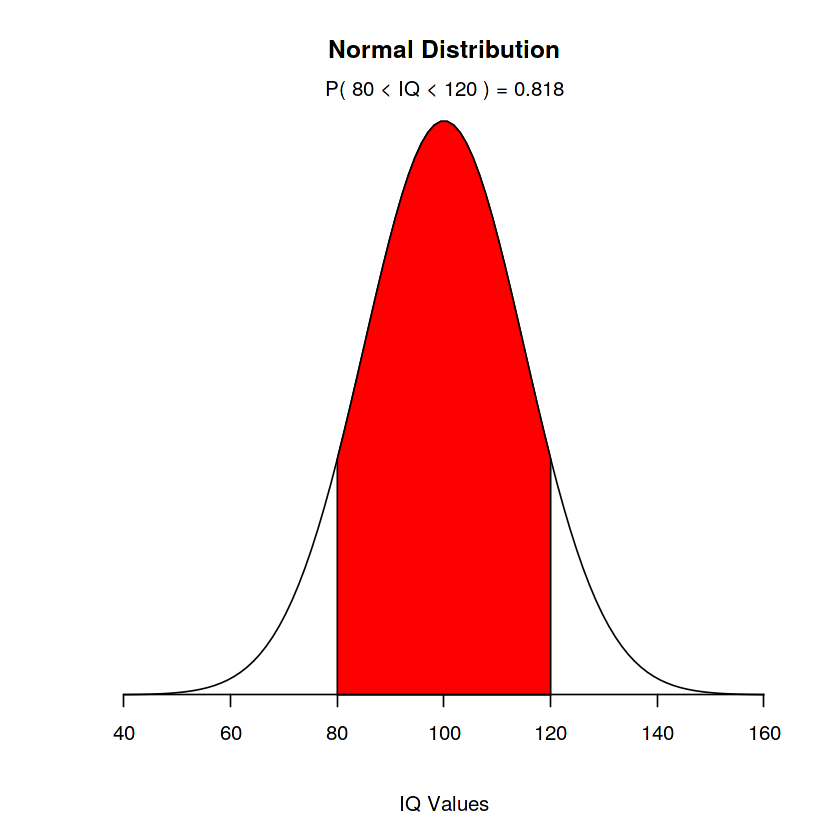

In [46]:
mean=100; sd=15
lb=80; ub=120

x <- seq(-4,4,length=100)*sd + mean
hx <- dnorm(x,mean,sd)

plot(x, hx, type="n", xlab="IQ Values", ylab="",
  main="Normal Distribution", axes=FALSE)

i <- x >= lb & x <= ub
lines(x, hx)
polygon(c(lb,x[i],ub), c(0,hx[i],0), col="red")

area <- pnorm(ub, mean, sd) - pnorm(lb, mean, sd)
result <- paste("P(",lb,"< IQ <",ub,") =",
   signif(area, digits=3))
mtext(result,3)
axis(1, at=seq(40, 160, 20), pos=0) 